# Pareto distribution

In [11]:
import jax.numpy as jnp
import matplotlib.pyplot as plt
from jax.scipy.stats import pareto

try:
    from probml_utils import savefig, latexify
except ModuleNotFoundError:
    %pip install -qq git+https://github.com/probml/probml-utils.git
    from probml_utils import savefig, latexify

In [12]:
latexify(width_scale_factor=2, fig_height=1.5)

In [61]:
def pareto_distribution(params, x, styles):
    labels = ["m={:.2f}, k={:.2f}".format(m, k) for m, k in params]

    plt.figure()
    for i, param in enumerate(params):
        m, k = param
        probabilities = pareto.pdf(x, k, scale=m)
        plt.plot(x, probabilities, styles[i], label=labels[i])

    plt.title("Pareto Distribution")
    plt.legend(fontsize=7)
    plt.axis((0.0, 0.5, 0, 20))
    savefig("paretoPdf.pdf")
    plt.show()

In [62]:
def log_pareto_distribution(params, x, styles):
    labels = ["m={:.2f}, k={:.2f}".format(m, k) for m, k in params]

    plt.figure()
    for i, param in enumerate(params):
        m, k = param
        probabilities = pareto.pdf(x, k, scale=m)
        plt.loglog(x, probabilities, styles[i], label=labels[i])

    plt.xlim(0.05, 1)
    plt.title("Log Pareto Distribution")
    plt.legend(fontsize=7)
    savefig("paretoLogPdf.pdf")
    plt.show()

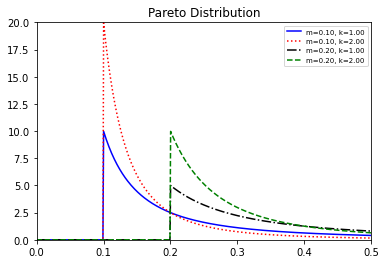

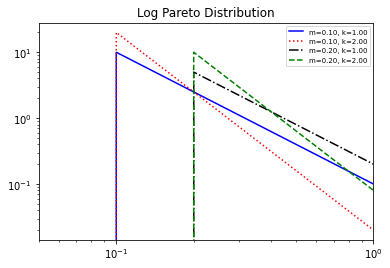

In [63]:
params = [(0.1, 1), (0.1, 2), (0.2, 1), (0.2, 2)]  # List of pair of parameters m and k
styles = ["b-", "r:", "k-.", "g--"]  # style of graph line corresponds to a parameter pair

x = jnp.linspace(0, 1, 1000)

pareto_distribution(params, x, styles)
log_pareto_distribution(params, x, styles)

## Interactive demo

In [6]:
from ipywidgets import interact


@interact(m=(0, 1.0), k=(1, 5.0))
def generate_interactinve_pareto(m, k):
    x = jnp.linspace(0, 1, 1000)

    probabilities = pareto.pdf(x, k, scale=m)
    plt.plot(x, probabilities)

    plt.xlim(0.05, 1)
    plt.title("Pareto Distribution")
    plt.show()

interactive(children=(FloatSlider(value=0.5, description='m', max=1.0), FloatSlider(value=3.0, description='k'…

In [7]:
from ipywidgets import interact


@interact(m=(0, 1.0), k=(1, 5.0))
def generate_interactinve_pareto_log(m, k):
    x = jnp.linspace(0, 1, 1000)

    probabilities = pareto.pdf(x, k, scale=m)
    plt.loglog(x, probabilities)

    plt.xlim(0.05, 1)
    plt.title("Log Pareto Distribution")
    plt.show()

interactive(children=(FloatSlider(value=0.5, description='m', max=1.0), FloatSlider(value=3.0, description='k'…